<h1>Part1</h1>

In [1]:
import pandas as pd
import json

In [2]:
file = open('logins.json') #read Json file

# returns JSON object as 
# a dictionary
data = json.load(file)

# Closing file
file.close()

In [3]:
keys = data.keys() # review the keys in the Json file
print(keys)

dict_keys(['login_time'])


In [4]:
print(len(data['login_time'])) # check the size of the file 
data['login_time'][:5] #check the first 5 data points

93142


['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21']

In [5]:
data['login_time'][-5:] #check the last 5 data points

['1970-04-13 18:50:19',
 '1970-04-13 18:43:56',
 '1970-04-13 18:54:02',
 '1970-04-13 18:57:38',
 '1970-04-13 18:54:23']

In [6]:
logins = data['login_time'] #extract the list of logins

In [7]:
df_logins = pd.DataFrame({'date':logins}) #create a dataframe to use the login information with logins as a column

In [8]:
df_logins['count'] = 1 #assume that each date time is a single login

In [9]:
df_logins['date'] = pd.to_datetime(df_logins['date']) #make the date column into a datetime format

In [10]:
df_logins.head()

,date,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [11]:
timed_df = df_logins.groupby(pd.Grouper(key = 'date', freq = '15Min'))['count'].count() #For analysis, we will group the logins by 15 min intervals

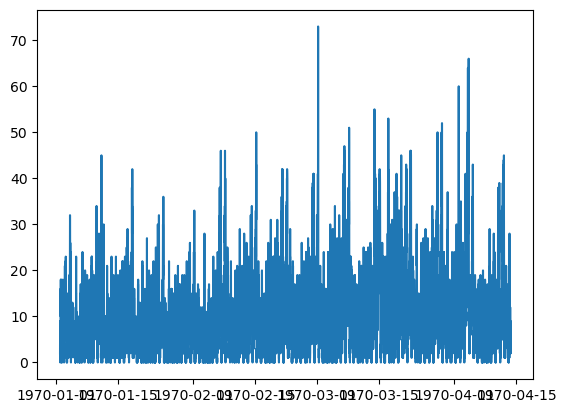

In [12]:
import matplotlib.pyplot as plt
#first visual inspection
plt.plot(timed_df)
plt.show()

As we can see from the graph above, there is too much data too see any patterns that we can use to describe. First we will look at one day (24 hours) data:

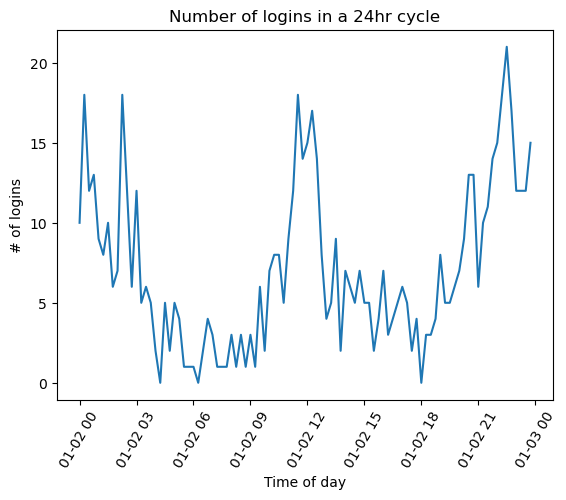

In [13]:
temp = timed_df['1970-01-02' : '1970-01-02']
fig = plt.plot(temp)
plt.xticks(rotation=60)
plt.xlabel('Time of day')
plt.ylabel('# of logins')
plt.title('Number of logins in a 24hr cycle')
plt.show()

In [14]:
temp.sort_values()

date
1970-01-02 18:00:00     0
1970-01-02 06:15:00     0
1970-01-02 04:15:00     0
1970-01-02 06:00:00     1
1970-01-02 07:15:00     1
                       ..
1970-01-02 11:30:00    18
1970-01-02 22:15:00    18
1970-01-02 02:15:00    18
1970-01-02 00:15:00    18
1970-01-02 22:30:00    21
Name: count, Length: 96, dtype: int64

As we can see, there seems to be a number of logins between midnight and 3 am and then it drastically goes down to close to 0 untils 11 am where it spikes again until around 1 pm. From 1 to 6 pm it stays around 5 logins to shoot up again after 6 pm (reaching the peak around 10:30 pm).
Next lets review the logins for a full week:

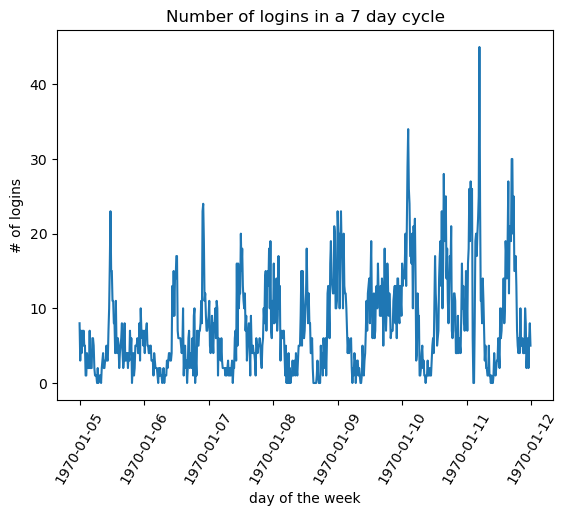

In [15]:
temp = timed_df['1970-01-05' : '1970-01-11']
fig = plt.plot(temp)
plt.xticks(rotation=60)
plt.xlabel('day of the week')
plt.ylabel('# of logins')
plt.title('Number of logins in a 7 day cycle')
plt.show()

As we can see, it looks like the behaviour is repeated every day with the peaks getting larger closer to the weekend (friday and saturday)

<h1>Part2</h1>

1) The measure of success I would recomment is the <b>(trips_Gotham + trips_Metropolis)/hours_driven</b> as a daily measure (<b>total_trips/hour</b>): <br>
Aligning with the Experiment's Goal: The primary objective of the experiment is to encourage driver partners to serve both cities, rather than remaining exclusive to one. By focusing on the change of this variable, we can directly measure the success of the toll reimbursement in motivating drivers to travel between Gotham and Metropolis to make up for the valleys at each city (hence taking advantage of the peak at the opposite city). At the same time, a significant increase in this metric would indicate a change in driver behavior, showing that drivers are more willing to serve both cities, which is the ultimate goal of the experiment.
2) The experiment I would choose, would include:
   <ul>
       <li>Select a random group of n drivers from gotham and metropolis, with similar hours/day, hours/week with n > 100.</li>
       <li>Would divide these drivers into test and control group</li>
       <li>To the test group, we will send marketing and educational videos for a week to let them know they will be reimbursed for toll crossings and explaining the importance of servicing both cities.</li>
       <li>After a week of education, we would activate the reimbursement for toll crossings on the test group.</li>
       <li>The metrics I would track (other than the metric discussed previously) are: #bridge_crossings, hours/day, hours/week. A sharp decresase on any of these metrics would require follow up with the driver to udnerstand and removal from the program if needed (to remove outside interferance with the results)</li>
   </ul>
   The statistical test I would conduct is a median test (chi-squared) to identify if the median number of total_trips/hour is different in both the test and control population. If we find that the difference in medians is other than 0 (and not within the 95% range), we can reject the null hypothesis that the median is the same and instead we can assume that there is a change in the total_trips/hour when there is a reimbursement of the bridge tolls.

<h1>Part3</h1>

In [16]:
file = open('ultimate_data_challenge.json') #read Json file

# returns JSON object as 
# a dictionary
data = json.load(file)

# Closing file
file.close()

In [17]:
data[:5] #review the first 5 records

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [18]:
df = pd.json_normalize(data) #Transform the Json file data into a pandas dataframe

In [19]:
df.head() #review the data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The first thing that pops up is that there is no memeber identification (like member ID, email or phone number). Given this, we will assume each row is a new rider. 
The first thing we will do is take a look at the columns and find the number of NAs. From the previous, it looks like we might have some missing data in the ratings of driver column, phone number and rating by drive. lets confirm and explore:

In [21]:
df.isna().sum().sort_values(ascending = False) #calculate the number of NAs

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

In [22]:
missing_rating_of_driver = df[df.avg_rating_of_driver.isna()]#lets take a look at the riders missing rating of driver
missing_rating_of_driver.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


In [23]:
missing_rating_of_driver.avg_surge.describe()

count    8122.000000
mean        1.078210
std         0.310306
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: avg_surge, dtype: float64

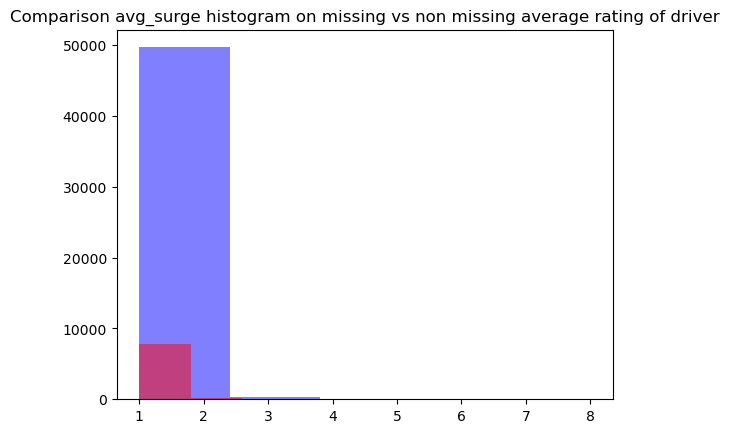

In [24]:
plt.hist(df.avg_surge, color='b', alpha = 0.5, bins=5)
plt.hist(missing_rating_of_driver.avg_surge, color='r', alpha = 0.5, bins=5)
plt.title('Comparison avg_surge histogram on missing vs non missing average rating of driver')
plt.show()

It doesnt look like there is a specific trend in terms of the visible variables regarding the missing rating_of_drivers. It looked like there could be some correlation with the average surge but based on the previous graph, we can see that the average surge follows a similar distribution for members with missing average rating so it is unlikely there is a correlation. Lets take a look at the relationship with the other missing variables:

In [25]:
print(f'There are {df.avg_rating_of_driver.isna().sum()} missing in the average_rating_of_driver column')
df[df.avg_rating_of_driver.isna()].isna().sum() #number of missing values when average rating of driver is missing

There are 8122 missing in the average_rating_of_driver column


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                       96
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver        67
dtype: int64

In [26]:
print(f'There are {df.phone.isna().sum()} missing in the phone column')
df[df.phone.isna()].isna().sum() #number of missing values when average rating of driver is missing

There are 396 missing in the phone column


city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver       96
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        3
dtype: int64

In [27]:
print(f'There are {df.avg_rating_by_driver.isna().sum()} missing in the avg_rating_by_driver column')
df[df.avg_rating_by_driver.isna()].isna().sum() #number of missing values when average rating of driver is missing

There are 201 missing in the avg_rating_by_driver column


city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver       67
avg_surge                   0
last_trip_date              0
phone                       3
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

There doesnt seem to be a correlation between the missing columns so it is time to start making decisions. The first one is to drop any column with all 3 values missing:

In [28]:
df = df.drop(index=df[df.avg_rating_of_driver.isna() & df.phone.isna()&df.avg_rating_by_driver.isna()].index)

Next, lets decide how to fill in each one of the missing columns:

In [29]:
df.avg_rating_of_driver.describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

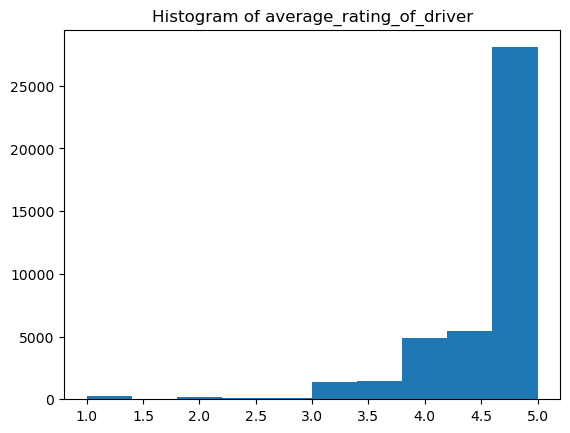

In [30]:
plt.hist(df.avg_rating_of_driver)
plt.title('Histogram of average_rating_of_driver')
plt.show()

<Axes: title={'center': 'avg_rating_of_driver'}, xlabel='[city]'>

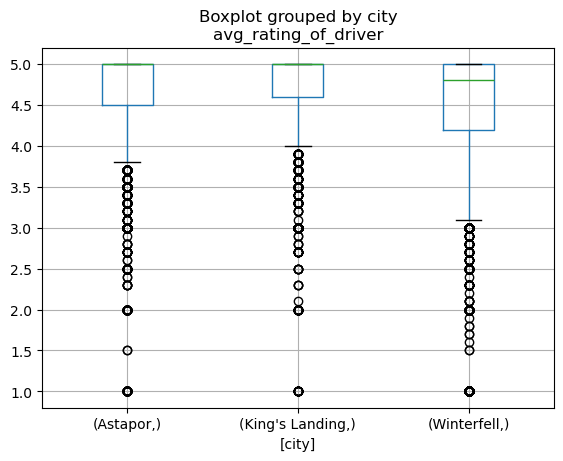

In [31]:
df.loc[:,['city', 'avg_rating_of_driver']].boxplot(by=['city'])

It looks like the rating_of_driver is somewhat dependant on the city, so we will fill the values based on the average for the city:

In [32]:
d={}
for c in df.city.unique():
    v = df[df.city==c].avg_rating_of_driver.mean() #value to fillna, mean of the column per city
    d.update({c:v}) #add the value to the dict
print(d)

{"King's Landing": 4.706996722052673, 'Astapor': 4.6305928042793285, 'Winterfell': 4.532996285596368}


In [33]:
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.city.map(d)) #fill out the N/A values using the dict mapped to the city column
df.avg_rating_of_driver.isna().sum()#confirm it worked

0

Next, we are going to identify how to fill out the phone:

In [34]:
df.phone.value_counts()/df.phone.count() #calculate the % difference in phone.

phone
iPhone     0.697162
Android    0.302838
Name: count, dtype: float64

In [35]:
df.phone

0         iPhone
1        Android
2         iPhone
3         iPhone
4        Android
          ...   
49995     iPhone
49996     iPhone
49997    Android
49998     iPhone
49999    Android
Name: phone, Length: 49998, dtype: object

Given that almost 70% of the phones are iphones compared with the Androids. We will use a fill forward strategy. Next lets review the average rating by driver:

In [36]:
df.phone = df.phone.fillna(method='ffill')
df.phone.isna().sum()

C:\Users\Alfredo\AppData\Local\Temp\ipykernel_1072\2643462693.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.phone = df.phone.fillna(method='ffill')


0

In [37]:
df.avg_rating_by_driver.describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

<Axes: title={'center': 'avg_rating_by_driver'}, xlabel='[city]'>

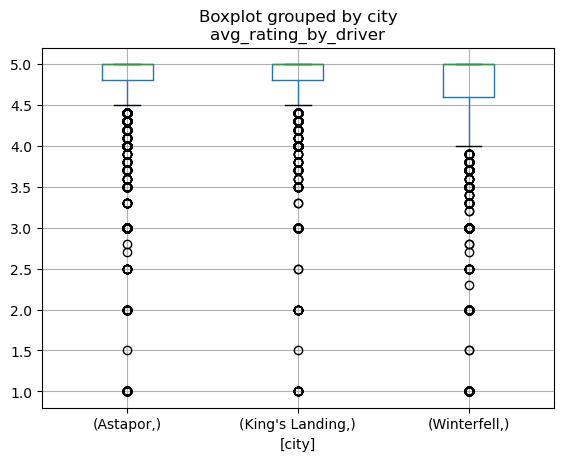

In [38]:
df.loc[:,['city', 'avg_rating_by_driver']].boxplot(by=['city'])

<Axes: title={'center': 'avg_rating_by_driver'}, xlabel='[ultimate_black_user]'>

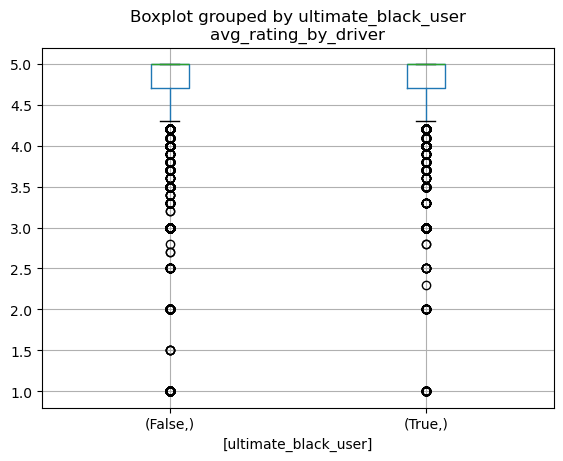

In [39]:
df.loc[:,['ultimate_black_user', 'avg_rating_by_driver']].boxplot(by=['ultimate_black_user'])

It looks like the overall average rating by driver is independent of city or ultimate_black_user which are intuitively some of the features that could impact it. Based on this, we will fill using the mean value. 

In [40]:
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())

Now we can actually start with the EDA. Lets run some descriptive statistics first:

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,49998.0,2.278271,3.792742,0.0,0.00,1.000000,3.00,125.00
avg_rating_of_driver,49998.0,4.600521,0.565611,1.0,4.50,4.706997,5.00,5.00
avg_surge,49998.0,1.074767,0.222340,1.0,1.00,1.000000,1.05,8.00
surge_pct,49998.0,8.849890,19.959132,0.0,0.00,0.000000,8.60,100.00
weekday_pct,49998.0,60.928521,37.080243,0.0,33.30,66.700000,100.00,100.00
avg_dist,49998.0,5.796666,5.707356,0.0,2.42,3.880000,6.94,160.96
avg_rating_by_driver,49998.0,4.778158,0.445762,1.0,4.70,5.000000,5.00,5.00


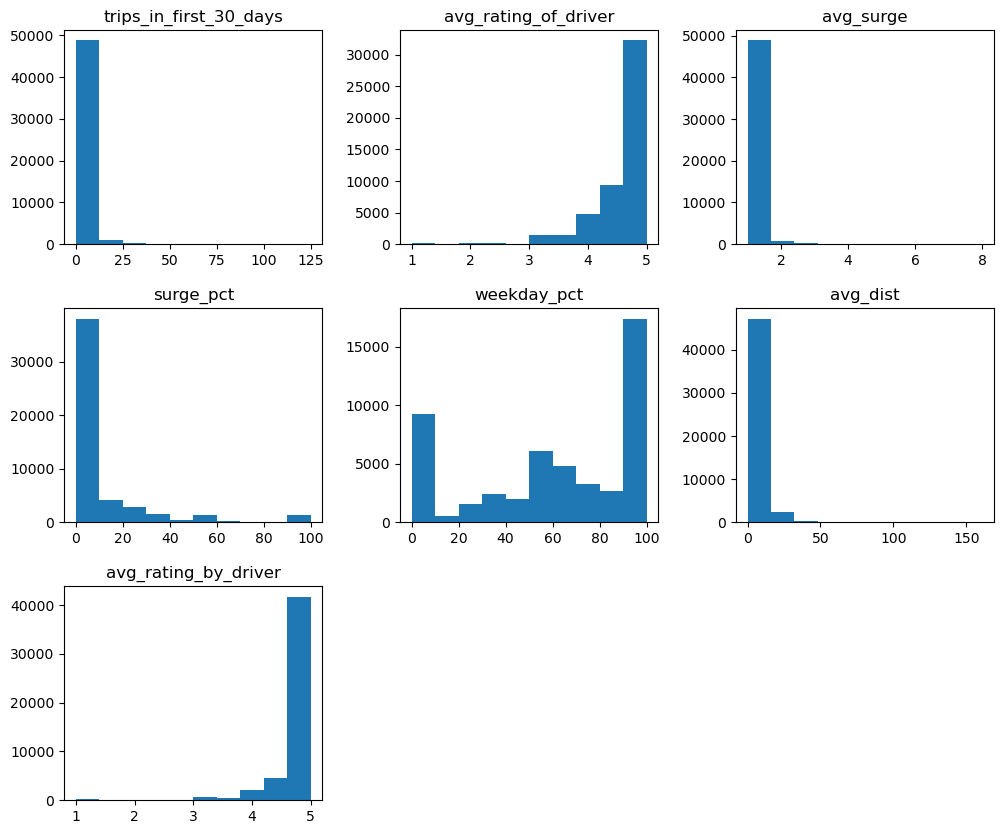

In [42]:
ax = df.hist(grid=False, figsize=(12,10), layout=(3,3))

<ul>
    <li><b>trips_in_first_30_days</b> Seems to be mostly under 10 with most cases being only 1 and a few cases going up to 125.</li>
    <li><b>avg_rating_of_driver as well as avg_rating_by_driver</b> are distributions close to 5 with similar behaviours exept for less variability in the rating_by_driver.</li>
    <li><b>weekday_pct</b> Shows that a large number of users are either taking almost 100% of their rides in the weeek or 0% of the rides in the weekdays. These could be a source of segmentation.</li>
    <li>Other variables dont seem to show an abnormal behaviour.</li>
</ul>

Before we continue with our analysis, lets create our metric of interest (active_membership):

In [43]:
print(df.columns)
df.head()

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [44]:
#convert to datetime all the date columns
df.signup_date = pd.to_datetime(df['signup_date'])
df.last_trip_date = pd.to_datetime(df['last_trip_date'])

In [45]:
date_pulled = df.last_trip_date.max() #assume the date pulled is on the last day a ride was taken (assuming the app is operating)

In [46]:
import datetime
df['days_since_last_ride'] = (date_pulled - df.last_trip_date).dt.days #number of days since last ride
df['active_member'] = 1 #create the active_member column assuming 1 (True)
df.loc[df.days_since_last_ride > 30, 'active_member'] = 0 #if the last ride was earlier than 30 days before the date pulled, we can assume they are not active members

In [47]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_ride,active_member
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,0


In [48]:
df['days_since_signup'] = (date_pulled - df.signup_date).dt.days #number of days since signup

In [49]:
df = df.drop(columns=['signup_date', 'last_trip_date']) #drop date columns
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_ride,active_member,days_since_signup
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,14,1,157
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,57,0,153
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,175,0,176
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2,1,172
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,108,0,155


First, lets identify how many cases of active members on their sixt month we have, to do this, lets see how many active members for members with more than 180 days since signup:

In [50]:
df[df['days_since_signup']>=180].active_member.value_counts()

active_member
0    1670
1    1071
Name: count, dtype: int64

In [51]:
df['active_after_180D'] = 0 #create the predictive col with 0 as default
df.loc[(df['days_since_signup']>=180)&(df['active_member']==1), 'active_after_180D']=1 #for valid cases, assing 1
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_ride,active_member,days_since_signup,active_after_180D
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,14,1,157,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,57,0,153,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,175,0,176,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,2,1,172,0
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,108,0,155,0


In [52]:
val_columns = df.dtypes[df.dtypes != 'object'].index #find the columns that are not string

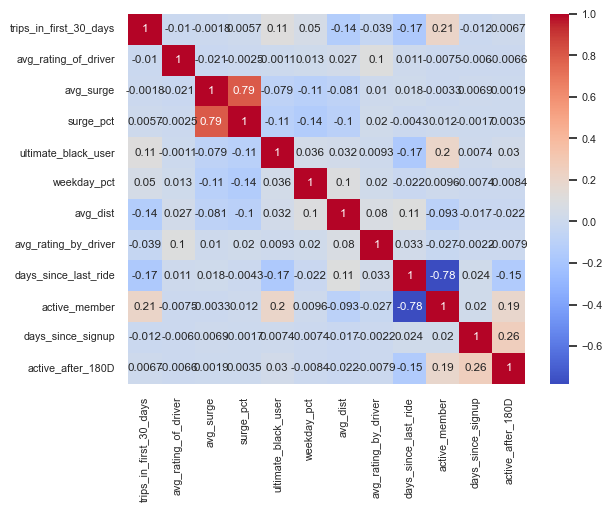

In [53]:
import seaborn as sns

correl_m = df[val_columns].corr() #create corr matrix
sns.set(font_scale=0.7)
sns.heatmap(correl_m, cmap = 'coolwarm', annot=True)#display the heatmap
plt.show()

Based on the initial EDA. it looks like the last_trip_date is closely correlated to a member being active (as expected since the days_since_last_ride is used to define a member being active), Also, active_member as well as days_since_signup are both highly correlated to active_after_180D, this makes sense as these variables were key in defining the predictive variable.

Other than this, there seems to be a correlation between the average_surge and the percentage of trips taken in surge). Lets graphically review some of the correlations of interest:

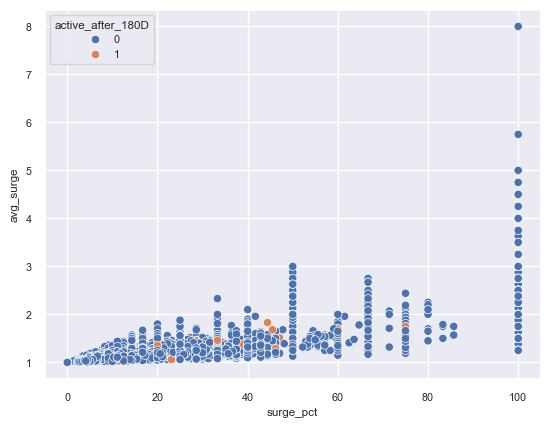

In [54]:
sns.scatterplot(x = df.surge_pct, y = df.avg_surge, hue=df.active_after_180D)
plt.show()

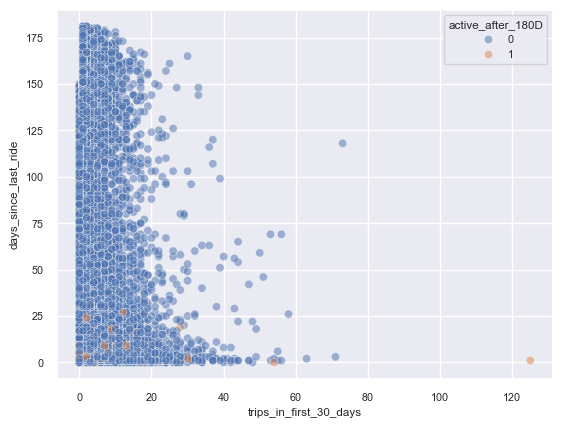

In [55]:
sns.scatterplot(x = df.trips_in_first_30_days, y = df.days_since_last_ride, hue=df.active_after_180D, alpha = 0.5)
plt.show()

Doesn't seem to be a strong correlation with the variables and not one that can explain a member being active after 180D, we will proceed to build a couple of different predictive models to be able to identify the best one. Before we can continue, lets encode the categorical variables:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49998 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49998 non-null  object 
 1   trips_in_first_30_days  49998 non-null  int64  
 2   avg_rating_of_driver    49998 non-null  float64
 3   avg_surge               49998 non-null  float64
 4   phone                   49998 non-null  object 
 5   surge_pct               49998 non-null  float64
 6   ultimate_black_user     49998 non-null  bool   
 7   weekday_pct             49998 non-null  float64
 8   avg_dist                49998 non-null  float64
 9   avg_rating_by_driver    49998 non-null  float64
 10  days_since_last_ride    49998 non-null  int64  
 11  active_member           49998 non-null  int64  
 12  days_since_signup       49998 non-null  int64  
 13  active_after_180D       49998 non-null  int64  
dtypes: bool(1), float64(6), int64(5), object(2)

In [57]:
to_encode=['city', 'phone'] #list of the variables to encode:

encoded_city = pd.get_dummies(df['city'], prefix = 'city', dtype = 'int64', drop_first = True) #encode City
df = df.join(encoded_city).drop('city', axis=1) #merge and drop the original

encoded_phone = pd.get_dummies(df['phone'], prefix = 'phone', dtype = 'int64', drop_first = True) #encode phone
df = df.join(encoded_phone).drop('phone', axis=1) #merge and drop the original

df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_ride,active_member,days_since_signup,active_after_180D,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,14,1,157,0,1,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,57,0,153,0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,175,0,176,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,2,1,172,0,1,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,108,0,155,0,0,1,0


In [58]:
df["ultimate_black_user"] = df["ultimate_black_user"].astype(int) #convert boolean to int
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_ride,active_member,days_since_signup,active_after_180D,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,14,1,157,0,1,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,57,0,153,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,175,0,176,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,2,1,172,0,1,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,108,0,155,0,0,1,0


Now we are ready to start modeling our data. Before we continue, lets identify what the current rate is as our base comparison. since we want to predict members active after 180D, we will divide our entire dataset into df_model (cases where the member has been signed up for over 6 momnths) and the rest (where we can apply the model)

In [59]:
df_model = df[df['days_since_signup'] >= 180] #we will use these cases to model
df_pred = df[df['days_since_signup'] < 180] # we will apply the results on this data to be able to predict

In [60]:
print(len(df_model))
print(len(df_pred))

2741
47257


In [61]:
100*df_model.active_after_180D.value_counts()/df_model.active_after_180D.count()

active_after_180D
0    60.926669
1    39.073331
Name: count, dtype: float64

Since 61% of the members are inactive, if we only assumed all members are inactive we would be correct 61% of the time. Since this is our base compparison, we need to improve from here:

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [63]:
import random 
random.seed(123)

In [64]:
#create X and y variables
y = df_model.active_after_180D
X = df_model.drop(columns = ['active_after_180D', 'days_since_signup', 'active_member']) #lets remove the predictive variable as well as the number of days since signup as we know df_model will always have > 180D vs <180D in the other dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y) #train test split using 30/70

#verify sizes for test/train sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2192, 12)
(549, 12)
(2192,)
(549,)


In [65]:
scaler = StandardScaler() #create standard scaler and scale both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
def print_results(y_test, y_pred):
    #lets review the quality using the standard metrics:
    print("Accuracy: %.3F"%metrics.accuracy_score(y_test,y_pred))
    print("Balanced accuracy: %.3F"%metrics.balanced_accuracy_score(y_test,y_pred))
    print('Precision score for "Yes":  %.3F'%metrics.precision_score(y_test,y_pred, pos_label = 1))
    print('Precision score for "No": %.3F'%metrics.precision_score(y_test,y_pred, pos_label=0))
    print('Recall score for "Yes": %.3F'%metrics.recall_score(y_test,y_pred, pos_label = 1))
    print('Recall score for "No": %.3F'%metrics.recall_score(y_test,y_pred, pos_label = 0))
    print('F1 score: %.3F'%metrics.f1_score(y_test,y_pred))

    cm = metrics.confusion_matrix(y_test, y_pred)
    _, ax = plt.subplots()
    display_cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not_active', 'active'])
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels = ['not_active', 'active'], fontsize = 8)
    ax.set_yticklabels(labels = ['not_active', 'active'], fontsize = 8)
    display_cm.plot(ax = ax)

<h4>Predict using constant</h4>

Accuracy: 0.608
Balanced accuracy: 0.500
Precision score for "Yes":  0.000
Precision score for "No": 0.608
Recall score for "Yes": 0.000
Recall score for "No": 1.000
F1 score: 0.000


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


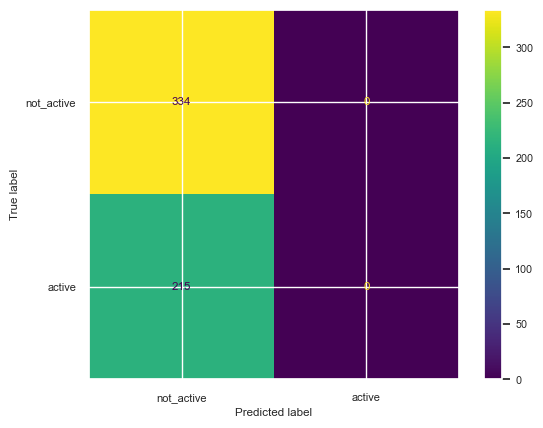

In [67]:
import numpy as np
y_pred = np.zeros(len(y_test))
print_results(y_test, y_pred)

<h4>KNN classifier</h4>

In [68]:
from sklearn.neighbors import KNeighborsClassifier
#first lets use a KNN model
knn = KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
y_pred_knn =knn.predict(X_test_scaled)

Accuracy: 0.880
Balanced accuracy: 0.880
Precision score for "Yes":  0.823
Precision score for "No": 0.921
Recall score for "Yes": 0.884
Recall score for "No": 0.877
F1 score: 0.852


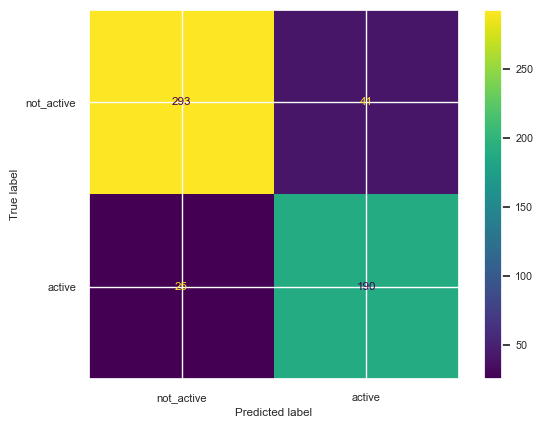

In [69]:
print_results(y_test, y_pred_knn)

<h4>Logistic Regression</h4>

Accuracy: 0.989
Balanced accuracy: 0.987
Precision score for "Yes":  0.995
Precision score for "No": 0.985
Recall score for "Yes": 0.977
Recall score for "No": 0.997
F1 score: 0.986


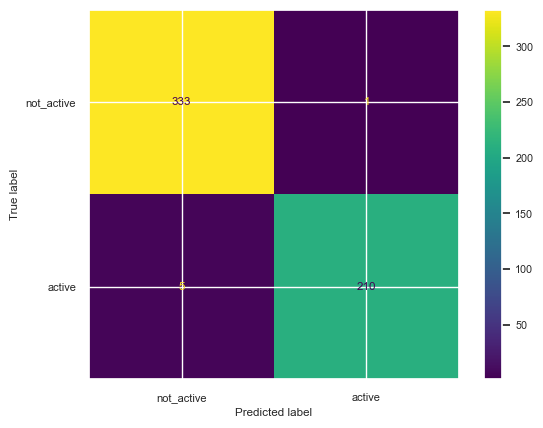

In [70]:
from sklearn.linear_model import LogisticRegression
#we will use the weights to make up for the imbalance of classes in this project
weights = {0:6, 1:4} 
clf = LogisticRegression(solver = 'liblinear', max_iter = 500, class_weight = weights)
clf.fit(X_train_scaled, y_train) 
y_pred_lr = clf.predict(X_test_scaled)
print_results(y_test, y_pred_lr)

<h4>Random Forest</h4>

Accuracy: 1.000
Balanced accuracy: 1.000
Precision score for "Yes":  1.000
Precision score for "No": 1.000
Recall score for "Yes": 1.000
Recall score for "No": 1.000
F1 score: 1.000


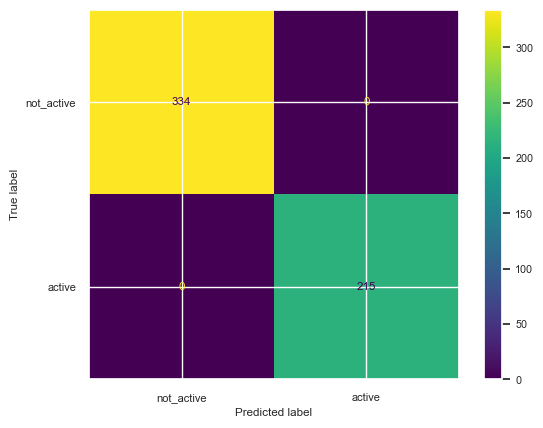

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print_results(y_test, y_pred_rf)

The overall results of these 3 models are great, using balanced accuracy and precision, we can compare:
<ul>
    <li>Constant: 0.5 accuracy, 0 precision.</li>
    <li>KNN: 0.88 accuracy, 0.823 precision.</li>
    <li>Logistic Regression: 0.987 accuracy, 0.995 precision.</li>
    <li>Random Forest: 1 accuracy, 1 precision.</li>
</ul>
Based on these results, we could use either of the models to predict. In order to have better explainability of the model (and to avoid overfitting), We will select the <b>Logistic Regression</b>.

Now that we have selected the model, we can explain what features impact the prediction and predict the rider retention at 6 months for the riders that have been with the app for less than 6 months:

In [72]:
# Coefficients and Odds Ratios
coefficients = clf.coef_[0]
odds_ratios = np.exp(coefficients)
# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance (Coefficient and Odds Ratio):
                   Feature  Coefficient    Odds Ratio
9      city_King's Landing     0.438146  1.549832e+00
0   trips_in_first_30_days     0.321517  1.379219e+00
11            phone_iPhone     0.139855  1.150107e+00
4      ultimate_black_user     0.107075  1.113018e+00
2                avg_surge     0.040105  1.040920e+00
10         city_Winterfell    -0.024468  9.758293e-01
6                 avg_dist    -0.043029  9.578837e-01
1     avg_rating_of_driver    -0.063945  9.380564e-01
5              weekday_pct    -0.145355  8.647149e-01
7     avg_rating_by_driver    -0.171537  8.423689e-01
3                surge_pct    -0.225854  7.978343e-01
8     days_since_last_ride   -16.862554  4.749914e-08


In [73]:
from sklearn.inspection import permutation_importance
# Permutation Importance
perm_importance = permutation_importance(clf, X_test_scaled, y_test, n_repeats=30, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))


Permutation Importance:
                   Feature  Importance Mean  Importance Std
8     days_since_last_ride         0.461020        0.015868
9      city_King's Landing         0.002611        0.003572
5              weekday_pct         0.002186        0.002226
4      ultimate_black_user         0.002064        0.001390
3                surge_pct         0.001943        0.002046
11            phone_iPhone         0.001700        0.001817
10         city_Winterfell         0.001154        0.000878
7     avg_rating_by_driver         0.001093        0.001379
0   trips_in_first_30_days         0.000911        0.002477
6                 avg_dist         0.000546        0.000835
2                avg_surge         0.000425        0.000903
1     avg_rating_of_driver         0.000364        0.001442


Based on the results seen above, it looks like the most important variables to predict if a customer will be active after 6 months, is driven mostly by  <b> Days since last ride</b>, followed by features like the city and the weekday percentage. 
One interesting finding is that riders from King's landing are more likely to remain active after 6 months.

Now, lets apply the resulting model to the data of all riders that have been with the app for less than 6 months:

In [74]:
#create X variable
X_pred = df_pred.drop(columns = ['active_after_180D', 'days_since_signup', 'active_member']) #lets remove the predictive variable as well as the number of days since signup as we know df_model will always have > 180D vs <180D in the other dataset

X_pred_scaled = scaler.transform(X_pred) #scale using same scaler

y_pred_new_data = clf.predict(X_pred_scaled) #predict using the model

In [81]:
y_pred_new_data.sum()/len(y_pred_new_data) #percentage of current users < 6 monhts,  predicted to remain at 6 months.

0.37232579300421104

These model helped us predict a probability for the users that have been using the app for less than 6 months to remain active after 6 months. We have identified what makes them more likely to remain active and as such we can use these predictions to try and target riders that are as of now predicted to not be active at 6 months.